<a href="https://colab.research.google.com/github/jiashenyue/salary-insights/blob/main/machine_learning_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sales Analysis: Machine Learning Part 1: Data Preparation**

Shenyue Jia | [jiashenyue.info](https://jiashenyue.info)

##**Overview**

**About the data**

The salary data for data scientist is collected and prepared by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).

**Data dictionary**


Variable Name  | Description
-------------------|------------------
Item_Identifier	| Unique product ID
Item_Weight	| Weight of product
Item_Fat_Content	| Whether the product is low fat or regular
Item_Visibility	| The percentage of total display area of all products in a store allocated to the particular product
Item_Type	| The category to which the product belongs
Item_MRP	| Maximum Retail Price (list price) of the product
Outlet_Identifier	| Unique store ID
Outlet_Establishment_Year	| The year in which store was established
Outlet_Size	| The size of the store in terms of ground area covered
Outlet_Location_Type	| The type of area in which the store is located
Outlet_Type	| Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	| Sales of the product in the particular store. This is the target variable to be predicted.

##**1. Data Preparation**
###**1.1 Load Data**

In [51]:
# import necessary libraries
import pandas as pd
import numpy as np

# machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config

# machine learning model
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

set_config(display='diagram')

This CSV data file does not contain the column names. So we read as no header. We will add the column names back later.

In [2]:
# load data
url = 'https://drive.google.com/file/d/11jKrfcHx1wcYdsfihvUrZTMGs-HpTzQY/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- We can use `df.shape` to obtain how many rows and colums in the data.

In [3]:
# check out basic dataframe information
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


In [4]:
# make a copy of the original data to avoid data manipulation
sales = df.copy()

###**1.2 Check for Duplicated, Missing, or Erroneous Data**

####**1.2.1 Check missing values**

In [5]:
# Display the sum of missing values
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####**1.2.2 Check duplicated rows**

In [6]:
# Check to see if there are any duplicate rows
duplicateRows = sales[df.duplicated()]
print(f'There are {len(duplicateRows)} duplicated rows in the dataframe')

There are 0 duplicated rows in the dataframe


- No duplicated rows detected

####**1.3 Check inconsistencies**

In [7]:
# Look at the info from the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# check value counts for each object column
categoricals = sales.select_dtypes(include='object')
for col in categoricals.columns:
  print(f"The unique values of the feature {col} are:\n")
  print(categoricals[col].value_counts())
  print("\n")

The unique values of the feature Item_Identifier are:

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The unique values of the feature Item_Fat_Content are:

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The unique values of the feature Item_Type are:

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The unique values of the 

Here are some discrepancies we found in `Item_Fat_Content` column:
- `reg` should be `Regular`
- `low fat` should be `Low Fat`
- `LF` should be `Low Fat`

In [9]:
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
# replace the inconsistent categories
sales.replace(to_replace=['LF', 'low fat'], value='Low Fat', inplace=True)
sales.replace(to_replace='reg', value = 'Regular', inplace=True)

In [11]:
# show what the column looks like after correction
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##**2. Splitting data**
###**2.1 Identify X and y variables**

**X and y variables**
- Target variable (y)
  - `Item_Outlet_Sales`
- Features (X), all the rest variables
  - `Item_Identifier`
  - `Item_Weight`
  - `Item_Fat_Content`
  - `Item_Visibility`
  - `Item_Type`
  - `Item_MRP`
  - `Outlet_Identifier`
  - `Outlet_Establishment_Year`
  - `Outlet_Size`
  - `Outlet_Location_Type`
  - `Outlet_Type`

In [12]:
# check if there are missing values in the Item_Outlet_Sales
sales['Item_Outlet_Sales'].isna().sum()

0

- There is no missing value in the target variable `Item_Outlet_Sales`

###**2.2 Split the data into training/testing parts**

- `Item_Outlet_Sales` column is our target variable.

In [13]:
# split X and y, you are predicting price
X = sales.drop(columns=['Item_Outlet_Sales']).copy()
y = sales['Item_Outlet_Sales'].copy()

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

##**3. Create transformers for data**

We will use 
- StandardScaler
- OneHotEncoder
- OrdinalEncoder and Imputers

###**3.1 Instantiate the transformers**

- We have missing values in the following columns
  - `type`
  - `calories per serving`
  - `grams of fat`
  - `grams of sugars`
  - `calories per serving`
- Only `type` is an `object` column, the rest are all numeric columns
- We can consider using the most frequent value to fill the missing values in `type`.
- For the numeric values, it is safer to use **median** as we cannot guarantee that each numeric column follows the normal distribution and the mean value can represent the middle status of the data.
- These strategies will be applied when we create a imputator

In [14]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

#this is showing for learning purpose but we are not using it here. 
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

###**3.2 Build an ordinal encoder**

In [15]:
#create a list of ordinal labels, in order of least to most

outlet_size_labels = ['Small','Medium','High']
outlet_location_labels = ['Tier 3','Tier 2','Tier 1']

#combine the ordered list in the order that the columns appear
ordered_labels = [outlet_size_labels, outlet_location_labels]

#handle_unknown is 'error' by default.  That's a good place to start
#but it may cause problems in a production model.  
ordinal = OrdinalEncoder(categories = ordered_labels)

###**3.2 Create a Pipeline Numeric Data and a Pipeline for Categorical Data**

- The **nominal** variables are
  - `Item_Identifier`
  - `Item_Fat_Content`
  - `Item_Type`
  - `Outlet_Identifier`
  - `Outlet_Type`
- The **ordinal** variables are
  - `Item_Fat_Content`
  - `Outlet_Size`
  - `Outlet_Location_Type`
- The **numeric** variables are
  - `Item_Weight`
  - `Item_Visibility`
  - `Item_MRP`
  - `Outlet_Establishment_Year`

We may consider dropping the `Item_Identifier` columns as they contain information that is not useful for our model.

In [16]:
# drop two identifier columns
sales = sales.drop(['Item_Identifier'], axis=1)
sales.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(median_imputer, scaler)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipeline = make_pipeline(missing_imputer, ohe)

###**3.3 Create Tuples to Pair Pipelines with Columns**

In [18]:
# Create column lists for objects and a number selector
ordinal_cols = ['Outlet_Size','Outlet_Location_Type']
nominal_cols = ['Item_Fat_Content','Item_Identifier','Item_Fat_Content','Item_Type',
                'Outlet_Identifier','Outlet_Type']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the make column selectors
numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

###**3.4 Create Column Transformer to Apply Different Preprocessing to Different Columns**
- Assemble the pipelines into a `preprocesser`
- We only have numeric and nominal variables in our data
- We use `drop` for the remainder

In [19]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(ordinal_tuple, 
                                          numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

- Display the `ColumnTransformer`

In [20]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 (...
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8917e62250>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Identifier',
                                  'Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type'])])

##**4. Transform our data and display the result**

In [21]:
# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [22]:
# show the shape of X_train after transformation
X_train_transformed.shape

(5966, 1583)

- Display the data after transformation
- Remember, here `X_train_transformed` is an Array, not a dataframe anymore

In [23]:
# display X_train first five rows
X_train_transformed[:5]

array([[ 1.        ,  0.        , -1.22586739, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.        ,  1.62771899, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.05644255, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  1.53283665, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.        ,  0.        ,  1.2956308 , ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
# check if there are any NaN values after transformation
np.isnan(X_train_transformed).sum()

0

##**5. Train a Linear Regression Model**

- Make and fit a linear regression model

In [26]:
# inspect the preprocessor
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 (...
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8917e62250>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Identifier',
                                  'Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type'])])

In [27]:
# fit a linear regression model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '3',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '1']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8917e62250>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

- Calculate y_hat predictions

In [28]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

- Function to evaluate model

In [29]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

- Evaluate linear regression model

In [30]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.67
  - MAE = 738.475
  - MSE = 975000.0
  - RMSE = 987.421

Results for testing data:
  - R^2 = -1.3788716713163139e+20
  - MAE = 2543748844772.772
  - MSE = 3.862210626419037e+26
  - RMSE = 19652507795238.34



###**Linear Regression Model Takeaways**

- This model performs well on the training data, but performs very poorly for the testing data.
- It is necessary to try a different model as the dataset may not suit a linear regression model.

##**6. Train a Regression Tree Model**

- Make and fit a decision tree model

In [32]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = dec_tree_pipe.predict(X_train)
y_hat_test = dec_tree_pipe.predict(X_test)

- Evaluate model performance

In [33]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 1.0
  - MAE = 0.0
  - MSE = 0.0
  - RMSE = 0.0

Results for testing data:
  - R^2 = 0.254
  - MAE = 1010.667
  - MSE = 2088160.231
  - RMSE = 1445.047



###**Baseline Regression Tree Model Takeaways**

- The untuned model performs well for training data, however, there is a signfiicant problem of overfitting, with **R^2 = 1**, which is unrealistic.
- The untuned model performs poorly for testing data, though slightly better than the linear regression model.
- We can consider tuning the baseline model.

###**Fine-tuning the regression tree model**

In [47]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [48]:
# Show models with the highest R^2
scores.sort_values("Test",ascending=False).head()

,Train,Test
5,0.604965,0.596347
6,0.61727,0.59531
4,0.583996,0.581223
7,0.631029,0.565457
8,0.643927,0.559983


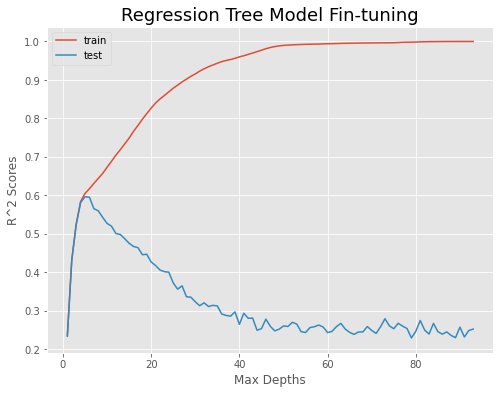

In [63]:
#plot the scores to visually determine the best max_depth
f, ax = plt.subplots(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R^2 Scores')
plt.xlabel('Max Depths')
ax.set_title('Regression Tree Model Fin-tuning',fontsize=18)
plt.legend()
plt.show()
     

- Fit the best model (**`max_depth = 5`**)

In [70]:
## Get final scores for best model
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=5)

# put the model into a pipeline
best_tree_pipe = make_pipeline(preprocessor, best_tree)
  
# fit the model
best_tree_pipe.fit(X_train, y_train)

# Get predictions to use to evaluate model
y_hat_train_best_tree = best_tree_pipe.predict(X_train)
y_hat_test_best_tree = best_tree_pipe.predict(X_test)

# Calculate model evaluation metrics
evaluate_model(y_train, y_hat_train_best_tree,split='training')
evaluate_model(y_test, y_hat_test_best_tree,split='testing')

Results for training data:
  - R^2 = 0.605
  - MAE = 760.518
  - MSE = 1168291.208
  - RMSE = 1080.875

Results for testing data:
  - R^2 = 0.596
  - MAE = 743.164
  - MSE = 1130629.328
  - RMSE = 1063.311



##**7. Model Recommendation**

- Regression tree model performs much better than linear regression model in testing data

**Model** | **Training R^2** | **Testing R^2**  
---|--- | ---
Linear Regression | 0.67 | -1.3788716713163139e+20
Regression Tree | 0.605 | 0.596

- We recommend adopting the regression tree model as it can create a much better prediction for the `Item_Outlet_Sales`.
- We are aware that the regression tree model cannot be conveniently interpreted as the linear regression model. However, the performance of linear regression model in testing data is too poor to be considered as a valid candidate.